The aim of this small data analysis is give a brief introduction about concept of Central Limit Theorem to people who are new to the field of Statistics and Data Science how easy is to actually visualize it the with a small dataset.

Before going to introduce the theory of CLT, let's look at the various important terminology:

1. **Population**: A population is the entire group that you want to draw conclusions about.
2. **Sample**: It is the specific set that you will collect data from which is always less than the total size of the population.

# Central Limit Theorem

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacementtext annotation indicator, then the distribution of the sample means will be approximately normally distributed.

This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30).

For the random samples we take from the population, we can compute the mean of the sample means:

\begin{equation*}
\mu_{\bar X} = \mu 
\end{equation*}

and the standard deviation of the sample means:

\begin{equation*}
\sigma_{\bar X}=\frac{\sigma}{\sqrt{n}}
\end{equation*}


In [97]:
#importing the required libraries

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings


In [2]:
#Getting the data from Github and importing as dataframe

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/data-8/textbook/main/assets/data/united_summer2015.csv')

#Let's look at how the table looks like
df

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


## Data Exploration

In [3]:
#Check the number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13825 entries, 0 to 13824
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           13825 non-null  object
 1   Flight Number  13825 non-null  int64 
 2   Destination    13825 non-null  object
 3   Delay          13825 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 432.2+ KB


In [5]:
#Description of the dataframe

df.describe()

,Flight Number,Delay
count,13825.000000,13825.000000
mean,1133.415045,16.658156
std,571.858597,39.481628
min,3.000000,-16.000000
25%,591.000000,-2.000000
50%,1178.000000,2.000000
75%,1670.000000,18.000000
max,2117.000000,580.000000


In [107]:
# Count the number of flights arriving throughout the US for the given days 
Destin=(df.groupby(by='Destination')[['Flight Number']].count())

#Sorting the list in Descending order
Destin.sort_values('Flight Number',ascending=False)

,Flight Number
Destination,
ORD,1368
EWR,1322
LAX,929
IAH,895
DEN,845
IAD,840
SEA,771
LAS,720
BOS,697


No handles with labels found to put in legend.


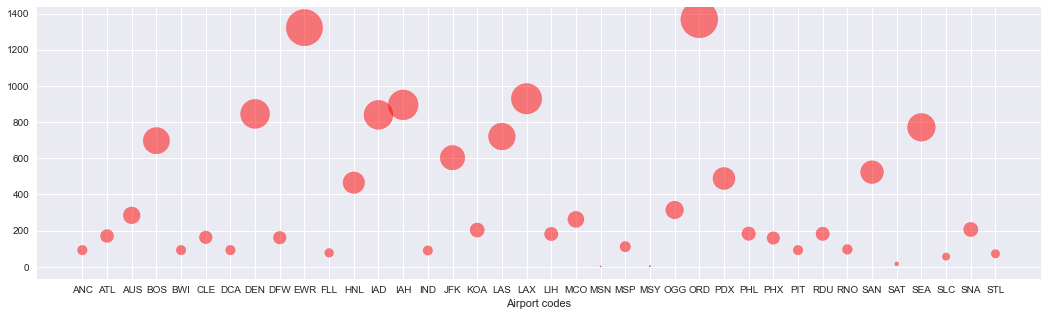

In [99]:
#Just visualize the number of flights landing at a particular airport!

Destin=(df.groupby(by='Destination')['Flight Number'].count())
plt.scatter(Destin.index, Destin.values, s=Destin.values,alpha=0.5,color='red')
plt.xlabel('Airport codes')
plt.legend()
plt.gcf().set_size_inches((18,5))
plt.show()


warnings.filterwarnings('ignore')


In [91]:
#The number of minutes 

print(df.groupby(by='Destination')[['Delay']].mean())

                 Delay
Destination           
ANC          15.336957
ATL          15.411765
AUS          15.225352
BOS          16.809182
BWI          18.097826
CLE          21.251534
DCA          24.380435
DEN          13.718343
DFW          19.621118
EWR          18.552194
FLL          22.818182
HNL          25.683871
IAD          15.661905
IAH          14.265922
IND          18.544444
JFK          18.452736
KOA          13.965517
LAS          12.036111
LAX          17.412271
LIH          13.403315
MCO          18.477099
MSN          13.000000
MSP          18.954955
MSY          37.000000
OGG          17.238854
ORD          18.522661
PDX          16.071721
PHL          16.825137
PHX          16.761006
PIT           9.804348
RDU          14.401099
RNO          16.541667
SAN          13.780115
SAT          -3.625000
SEA          16.900130
SLC          10.142857
SNA          10.033981
STL          23.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002401A9DE4F0>]],
      dtype=object)

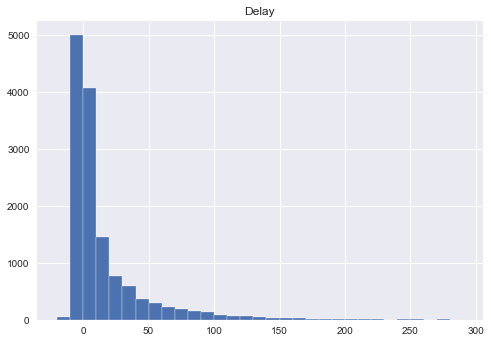

In [18]:
#Plotting to see the distribution of the time the flight got delayed by

#this is a skewed graph

df.hist('Delay', bins=np.arange(-20,300,10), ec='w')

To check CLT let's calculate average of random sample of 500 rows 2500 times to create a list('sample_of_samples') of 2500 averages from this dataset

This is a skewed graph, Skewedness you ask, It is, in simple terms, refers to assymetry in a bell shaped curve. In the figure below, the ideal bell shape is in middle and the skewed graphs are on its either side

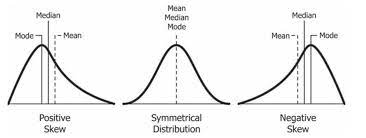

Our distribution looks similar to the image on the left, we can also call our graph as one having a right tail (Don't blame me some smart guy named it that way). 

### Now is the time to visualize some CLT stuff

Text(0, 0.5, 'Count')

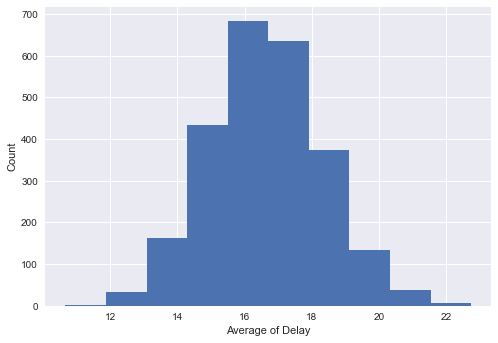

In [101]:
sample_size=500

sample_of_samples=[]

for i in range(2500):
    sample = df.sample(sample_size)
    sample_avg=sample['Delay'].mean()
    sample_of_samples.append(sample_avg)
    
# print(sample_of_samples)

plt.hist(sample_of_samples)
plt.xlabel('Average of Delay')
plt.ylabel('Count')

Looking at the graph we can say that we have somewhat been successful in getting a symmetric(almost) graph which is true in accordance with CLT

We can do this for many sets of different numbers of sample size. The takeaway here is we have a bell shape graph, yes, 
it is not perfect but for this representation this would do. If we increase the sample size then we will tend to reach 
a smoother curve
 

# References

1. https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/BS704_Probability12.html
2. Data has been taken from : https://www.transtats.bts.gov/nosessionvar.asp
3. https://inferentialthinking.com/chapters/10/2/Sampling_from_a_Population.html